## Import Dataset

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"CIFAR-10 Train Dataset Shape: {x_train.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 Train Dataset Shape: (50000, 32, 32, 3)


## Preprocessing and Exploration

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
import matplotlib.pyplot as plt

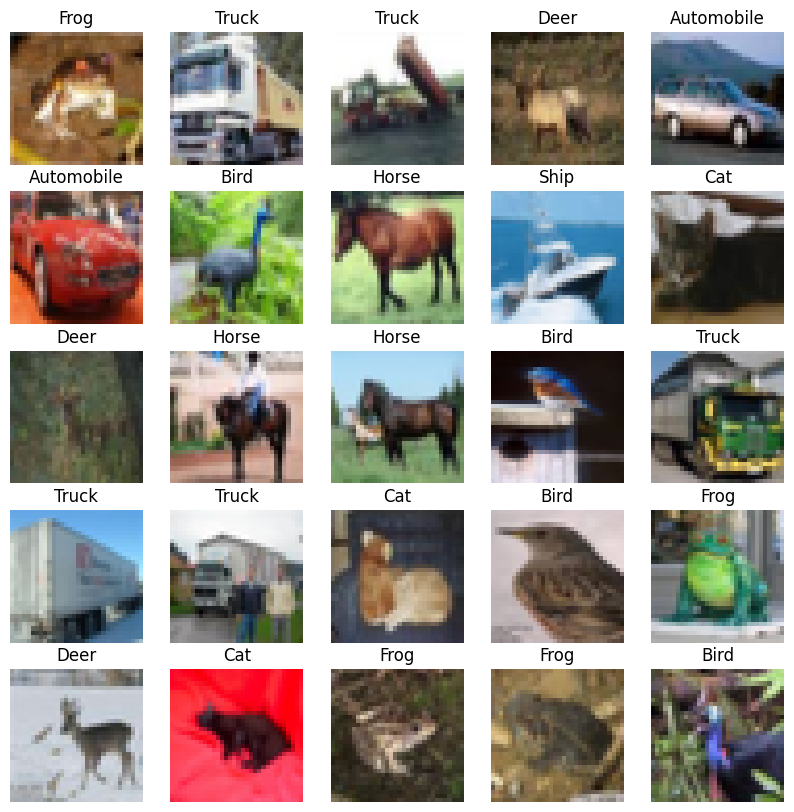

In [4]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')

plt.show()

## Build & Train First CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
  	MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
  	MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
  	MaxPooling2D(2, 2),
  	Flatten(),
  	Dense(256, activation='relu'),
    Dropout(0.5),
  	Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,274 (887.79 KB)

 Trainable params: 227,210 (887.54 KB)

 Non-trainable params: 64 (256.00 B)

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3608 - loss: 1.7395 - val_accuracy: 0.5331 - val_loss: 1.3063
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5818 - loss: 1.1846 - val_accuracy: 0.6408 - val_loss: 1.0333
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6516 - loss: 1.0081 - val_accuracy: 0.6538 - val_loss: 1.0013
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6878 - loss: 0.8954 - val_accuracy: 0.6526 - val_loss: 1.0215
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7221 - loss: 0.8041 - val_accuracy: 0.5945 - val_loss: 1.2463


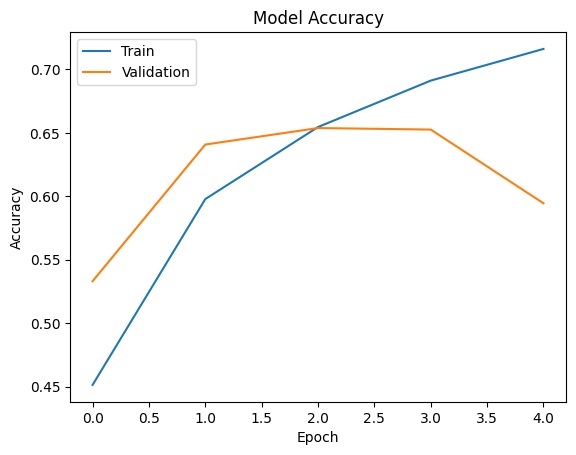

In [9]:
# Plot Accuracies
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Enhancements

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.3454 - loss: 1.7773 - val_accuracy: 0.5355 - val_loss: 1.2910
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5272 - loss: 1.3279 - val_accuracy: 0.5858 - val_loss: 1.1981
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5902 - loss: 1.1714 - val_accuracy: 0.5462 - val_loss: 1.3903
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6190 - loss: 1.0906 - val_accuracy: 0.5672 - val_loss: 1.2697
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6363 - loss: 1.0448 - val_accuracy: 0.6772 - val_loss: 0.9485
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6575 - loss: 1.0047 - val_accuracy: 0.6468 - val_loss: 1.0488
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6556 - loss: 0.9767 - val_accuracy: 0.6982 - val_loss: 0.8891
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6708 - loss: 0.95

**Evaluation**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [14]:
preds = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, preds)

print(classification_report(y_test, preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.66      0.85      0.75      1000
           2       0.67      0.46      0.54      1000
           3       0.64      0.21      0.32      1000
           4       0.63      0.51      0.56      1000
           5       0.79      0.37      0.51      1000
           6       0.38      0.95      0.54      1000
           7       0.79      0.64      0.71      1000
           8       0.91      0.57      0.70      1000
           9       0.60      0.90      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.68      0.62      0.61     10000
weighted avg       0.68      0.62      0.61     10000



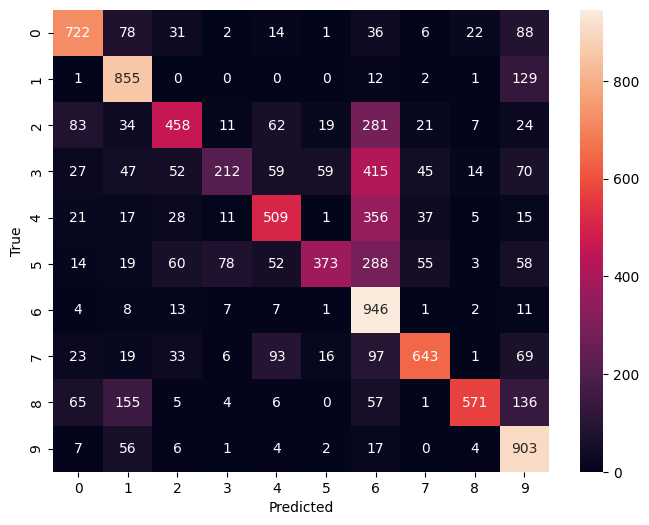

In [15]:
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## Optimization with Transfer Learning

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

**Preprocess Dataset**

In [17]:
indexes = [ind for ind, name in enumerate(class_names) if name in ['Airplane', 'Automobile', 'Ship', 'Truck']]
indexes

[0, 1, 8, 9]

In [18]:
import numpy as np

x_train_classes = []
y_train_classes = []
x_test_classes = []
y_test_classes = []

for ind in indexes:
  x_train_classes.append(x_train[y_train.reshape(-1) == ind])
  y_train_classes.append(y_train[y_train.reshape(-1) == ind])
  x_test_classes.append(x_test[y_test.reshape(-1) == ind])
  y_test_classes.append(y_test[y_test.reshape(-1) == ind])

x_train_cust = np.concatenate(x_train_classes)
y_train_cust = np.concatenate(y_train_classes)
x_test_cust = np.concatenate(x_test_classes)
y_test_cust = np.concatenate(y_test_classes)

np.unique(y_train_cust), np.unique(y_test_cust), x_train_cust.shape, x_test_cust.shape

(array([0, 1, 8, 9], dtype=uint8),
 array([0, 1, 8, 9], dtype=uint8),
 (20000, 32, 32, 3),
 (4000, 32, 32, 3))

In [19]:
for ind, val in enumerate(indexes):
  y_train_cust[y_train_cust == val] = ind
  y_test_cust[y_test_cust == val] = ind

np.unique(y_train_cust), np.unique(y_test_cust)

(array([0, 1, 2, 3], dtype=uint8), array([0, 1, 2, 3], dtype=uint8))

In [20]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_cust)

In [21]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_cust, y_train_cust, batch_size=64), epochs=20, validation_data=(x_test_cust, y_test_cust))

/tmp/ipython-input-1165591175.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2434 - loss: 1.3888 - val_accuracy: 0.2555 - val_loss: 1.4097
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.2549 - loss: 1.3862 - val_accuracy: 0.2535 - val_loss: 1.4629
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.2816 - loss: 1.3830 - val_accuracy: 0.2503 - val_loss: 1.6190
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.2831 - loss: 1.3799 - val_accuracy: 0.2460 - val_loss: 1.9235
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.2989 - loss: 1.3758 - val_accuracy: 0.2432 - val_loss: 2.2375
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.2977 - loss: 1.3742 - val_accuracy: 0.2432 - val_loss: 2.5891
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3009 - loss: 1.3695 - val_accuracy: 0.2395 - val_loss: 2.7704
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.3066 - loss: 1.3687 - val_accurac

In [22]:
import tensorflow as tf

In [23]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_cust, y_train_cust, batch_size=64), epochs=100, validation_data=(x_test_cust, y_test_cust))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 112ms/step - accuracy: 0.2663 - loss: 3.5170 - val_accuracy: 0.2533 - val_loss: 2.1628
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3162 - loss: 1.9870 - val_accuracy: 0.2618 - val_loss: 2.6377
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3422 - loss: 1.7921 - val_accuracy: 0.2828 - val_loss: 1.5223
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.3678 - loss: 1.5824 - val_accuracy: 0.2725 - val_loss: 1.5955
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.3759 - loss: 1.4939 - val_accuracy: 0.2660 - val_loss: 1.7334
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.3896 - loss: 1.4419 - val_accuracy: 0.2690 - val_loss: 1.9186
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.3973 - loss: 1.3956 - val_accuracy: 0.2713 - val_loss: 2.1862
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.4103 - loss: 

## Evaluation

In [24]:
preds_percent = model.predict(x_test_cust)

preds = preds_percent.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


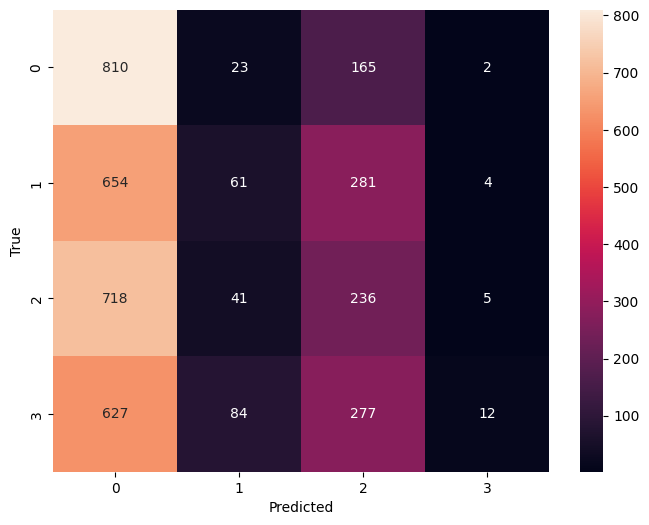

In [25]:
cm = confusion_matrix(y_test_cust, preds)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [26]:
from sklearn.metrics import roc_curve, auc

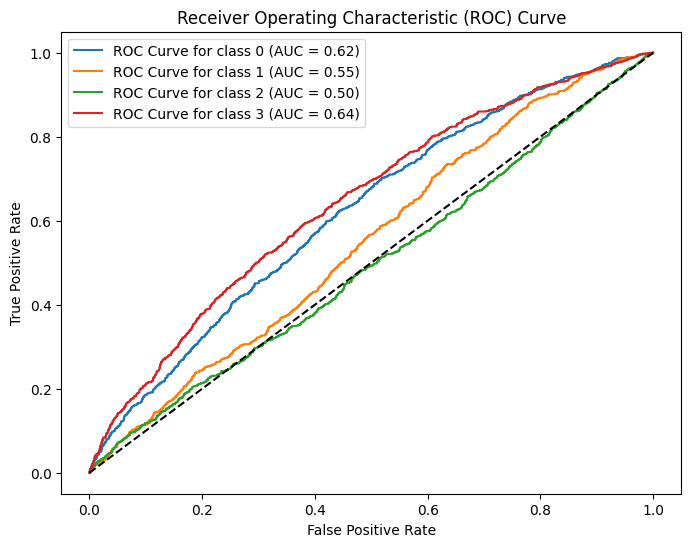

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test_cust, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_percent[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve for class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Test using Images

In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [54]:
from google.colab import files
uploaded = files.upload()

Saving automobile image.jpeg to automobile image.jpeg


In [55]:
filename = ''
for key in uploaded.keys():
  filename = key

filename

'automobile image.jpeg'

In [56]:
img = image.load_img(filename, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Predicted Class: Automobile with Confidence: 67.78%



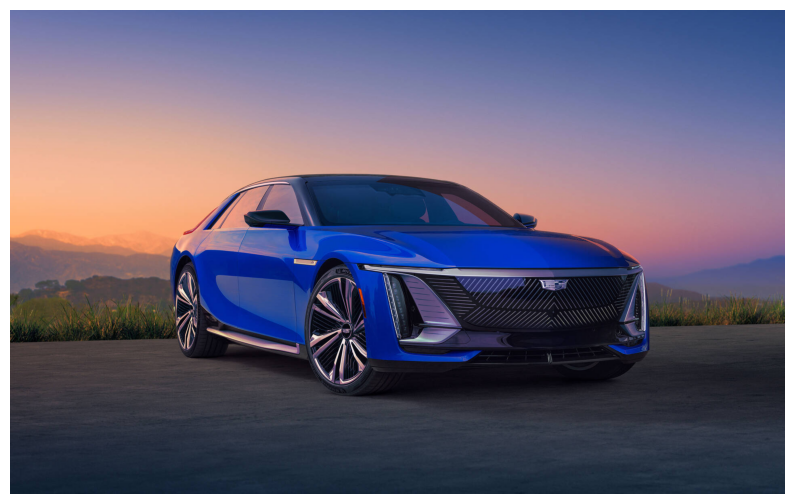

In [57]:
prediction = np.argmax(predictions, axis=1)

predict_class = class_names[prediction[0]]
prediction_confidence = predictions[0][prediction[0]] * 100

print(f"Predicted Class: {predict_class} with Confidence: {prediction_confidence:.2f}%\n")

img = plt.imread(filename)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

## Save Model

In [58]:
model.save("CIFAR-10  Vehicle classification model.h5")